In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,QuantileTransformer,RobustScaler,Normalizer,MaxAbsScaler,MinMaxScaler,PowerTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from pca import pca
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, v_measure_score
%matplotlib inline

In [2]:
df_training =  pd.read_csv("training_set_v1_dr7.csv")
columnsNamesArr = df_training.columns.values
column_names = list(columnsNamesArr)
print(column_names[1:])

['ra', 'dec', 'g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'concentration_index', 'photo_z', 'frac_dev', 'host_galaxy', 'distance', 'axis_ratio', 'category', 'radius', 'magnitude', 'u_mag', 'g_mag', 'i_mag', 'r_mag', 'z_mag', 'link']


In [3]:
features = ['g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'concentration_index', 'photo_z', 'frac_dev', 'axis_ratio','radius', 'magnitude']
print(len(features))
category = df_training['category']

11


In [4]:
classification = np.NaN*np.ones(len(category))
classification[category == 'Known galaxies'] = 1  
classification[category == 'Contaminant'] = 0 

In [5]:
x = df_training.loc[:,features].values
y = df_training.loc[:,['category']].values

# Unscaled

In [6]:
pca_12 = PCA(n_components = 11, random_state = 2020)
pca_12.fit(x)
x_pca_12 = pca_12.transform(x)

In [7]:
print("Variance explained by all 12 principal components = ", sum(pca_12.explained_variance_ratio_*100))

Variance explained by all 12 principal components =  100.00000000000001


In [8]:
print(pca_12.explained_variance_ratio_[0]*100)

99.99260864800983


Text(0, 0.5, 'Explained variance')

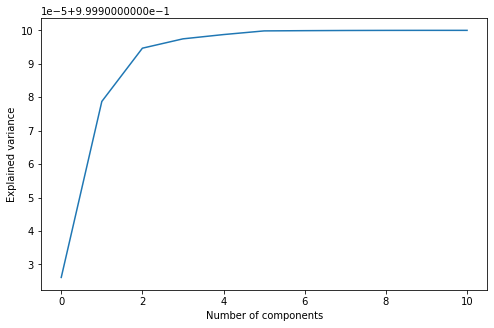

In [9]:
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca_12.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [10]:
pca_2 = PCA(n_components = 2, random_state = 2020)
principal_components_2 = pca_2.fit_transform(x)
principal_df_2 = pd.DataFrame(data = principal_components_2, columns = ['Principal Component 1','Principal Component 2'])
final_df_2 = pd.concat([principal_df_2, df_training[['category']]], axis = 1)

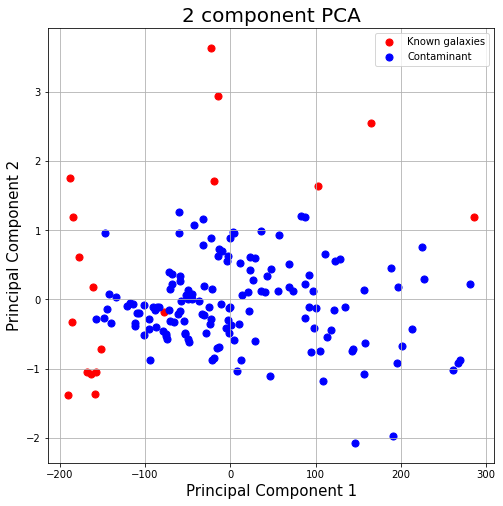

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Known galaxies','Contaminant']
colors = ['red','blue']
for target, color in zip(targets,colors):
    indicesToKeep = final_df_2['category'] == target
    ax.scatter(final_df_2.loc[indicesToKeep,'Principal Component 1'], final_df_2.loc[indicesToKeep, 'Principal Component 2'], c=color,s=50)
ax.legend(targets)
ax.grid()

In [12]:
pca_3 = PCA(n_components = 3, random_state = 2020)
principal_components_3 = pca_3.fit_transform(x)
principal_df_3 = pd.DataFrame(data = principal_components_3, columns = ['Principal Component 1','Principal Component 2','Principal Component 3'])
final_df_3 = pd.concat([principal_df_3, df_training[['category']]], axis = 1)

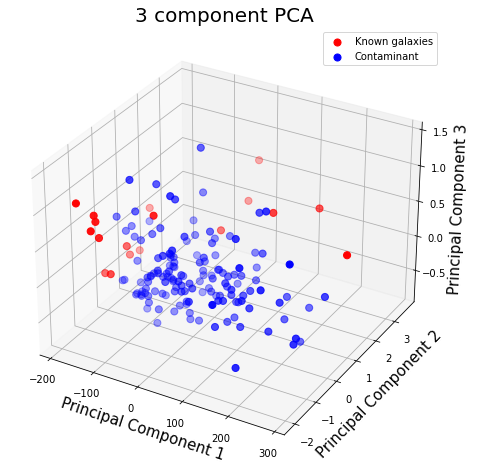

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['Known galaxies','Contaminant']
colors = ['red','blue']
for target, color in zip(targets,colors):
    indicesToKeep = final_df_3['category'] == target
    ax.scatter(final_df_3.loc[indicesToKeep,'Principal Component 1'], final_df_3.loc[indicesToKeep, 'Principal Component 2'], final_df_3.loc[indicesToKeep,'Principal Component 3'], c=color,s=50)
ax.legend(targets)
ax.grid()

# Scaled

## 11 component PCA

In [14]:
x_scaled = RobustScaler().fit_transform(x)

In [15]:
pca_11_scaled = PCA(n_components = 11, random_state = 2020)
pca_11_scaled.fit(x_scaled)
x_pca_11_scaled = pca_11_scaled.transform(x_scaled)

In [16]:
print("Variance explained by all 11 principal components = ", sum(pca_11_scaled.explained_variance_ratio_*100))

Variance explained by all 11 principal components =  100.00000000000001


Text(0, 0.5, 'Explained variance')

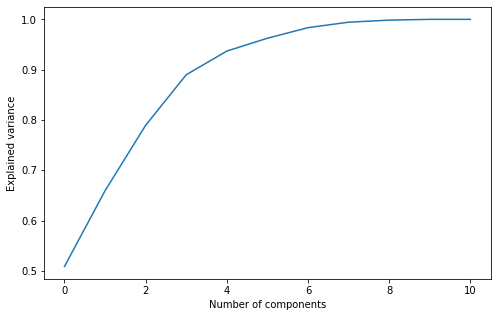

In [17]:
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca_11_scaled.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

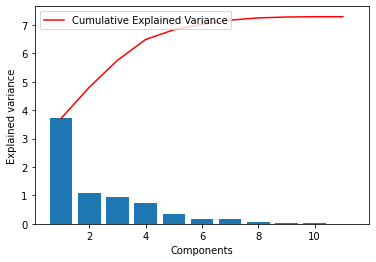

In [18]:
plt.bar(range(1,len(pca_11_scaled.explained_variance_ )+1),pca_11_scaled.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca_11_scaled.explained_variance_ )+1),
         np.cumsum(pca_11_scaled.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

In [39]:
plt.rcParams.update({'font.size': 15})

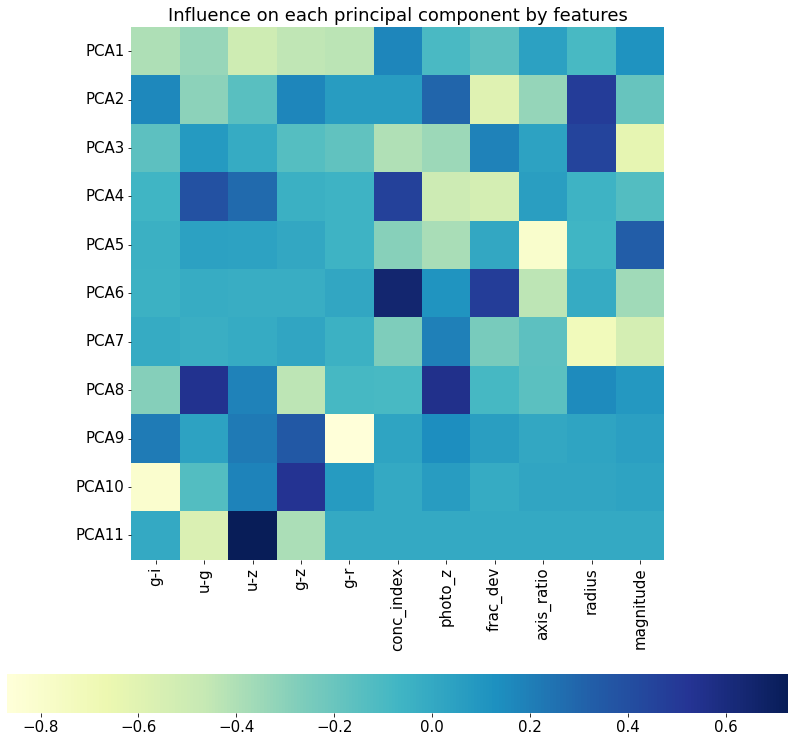

In [41]:
features_map = ['g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'conc_index', 'photo_z', 'frac_dev', 'axis_ratio','radius', 'magnitude']
fig = plt.figure(figsize = (14,14))
ax = sns.heatmap(pca_11_scaled.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca_11_scaled.n_components_+1)],
                 xticklabels=features_map,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
ax.set_title('Influence on each principal component by features')
plt.savefig('pca_comparison.png')

## 2 component PCA

In [20]:
pca_2_scaled = PCA(n_components = 2, random_state = 2020)
principal_components_2_scaled = pca_2_scaled.fit_transform(x_scaled)
principal_df_2_scaled = pd.DataFrame(data = principal_components_2_scaled, columns = ['Principal Component 1','Principal Component 2'])
final_df_2_scaled = pd.concat([principal_df_2_scaled, df_training[['category']]], axis = 1)


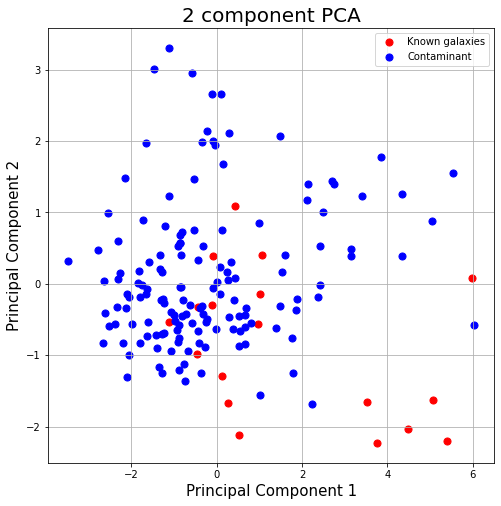

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Known galaxies','Contaminant']
colors = ['red','blue']
for target, color in zip(targets,colors):
    indicesToKeep = final_df_2_scaled['category'] == target
    ax.scatter(final_df_2_scaled.loc[indicesToKeep,'Principal Component 1'], final_df_2_scaled.loc[indicesToKeep, 'Principal Component 2'], c=color,s=50)
ax.legend(targets)
ax.grid()

In [22]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.1/(xs.max() - xs.min())
    scaley = 1.1/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = classification, cmap = 'bwr')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'black',alpha = 0.8)
        if labels is None:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center',fontsize=13)
        else:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, labels[i], color = 'g', ha = 'center', va = 'center',fontsize=13)
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.title('PCA BiPlot')
    plt.grid()

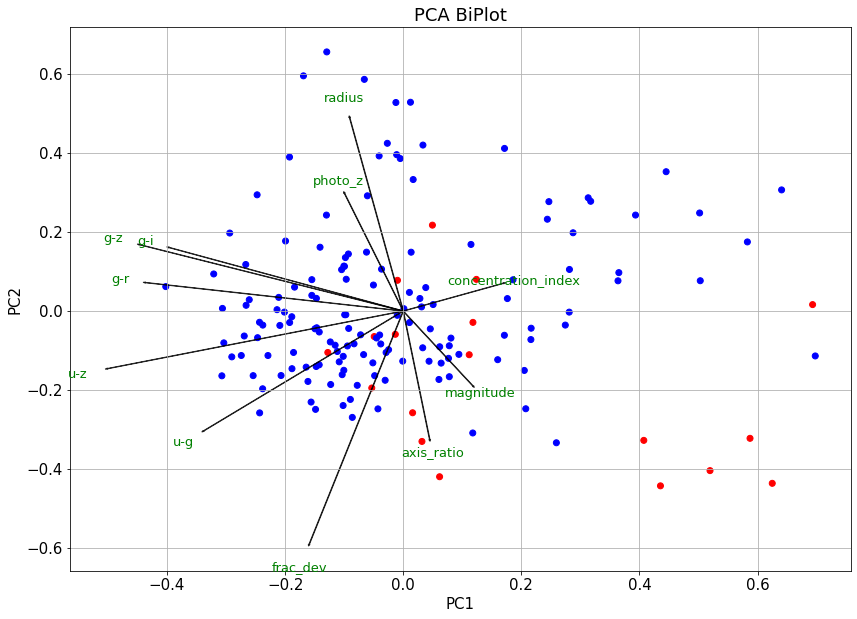

<Figure size 432x288 with 0 Axes>

In [42]:
fig = plt.figure(figsize = (14,10))
myplot(principal_components_2_scaled[:,0:2],np.transpose(pca_2_scaled.components_[0:2, :]),features)
plt.show()
plt.savefig('pca_biplot.png')

In [43]:
loadings = 4*pca_2_scaled.components_.T * np.sqrt(pca_2_scaled.explained_variance_)

fig = px.scatter(principal_components_2_scaled, x=0, y=1, color= classification, color_continuous_scale=["blue","red"])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()
# plt.savefig('pca_biplot.png')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Influence on each principal component by features')

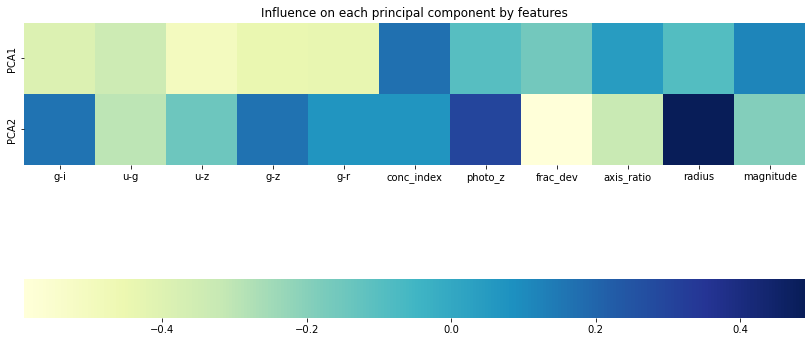

In [25]:
features_map = ['g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'conc_index', 'photo_z', 'frac_dev', 'axis_ratio','radius', 'magnitude']
fig = plt.figure(figsize = (14,14))
ax = sns.heatmap(pca_2_scaled.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca_2_scaled.n_components_+1)],
                 xticklabels=features_map,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
ax.set_title('Influence on each principal component by features')

## 3 component PCA

In [26]:
pca_3_scaled = PCA(n_components = 3, random_state = 2020)
principal_components_3_scaled = pca_3_scaled.fit_transform(x_scaled)
principal_df_3_scaled = pd.DataFrame(data = principal_components_3_scaled, columns = ['Principal Component 1','Principal Component 2','Principal Component 3'])
final_df_3_scaled = pd.concat([principal_df_3_scaled, df_training[['category']]], axis = 1)

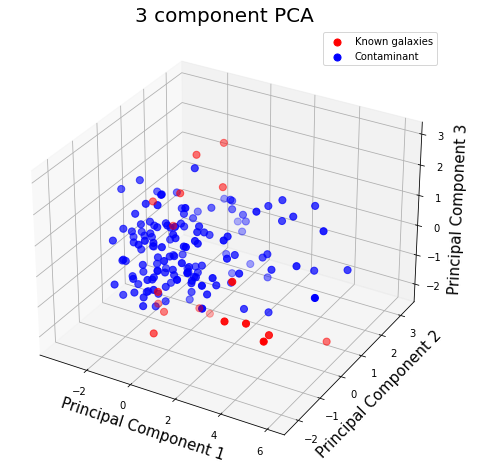

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['Known galaxies','Contaminant']
colors = ['red','blue']
for target, color in zip(targets,colors):
    indicesToKeep = final_df_3_scaled['category'] == target
    ax.scatter(final_df_3_scaled.loc[indicesToKeep,'Principal Component 1'], final_df_3_scaled.loc[indicesToKeep, 'Principal Component 2'], final_df_3_scaled.loc[indicesToKeep,'Principal Component 3'], c=color,s=50)
ax.legend(targets)
ax.grid()

Text(0.5, 1.0, 'Influence on each principal component by features')

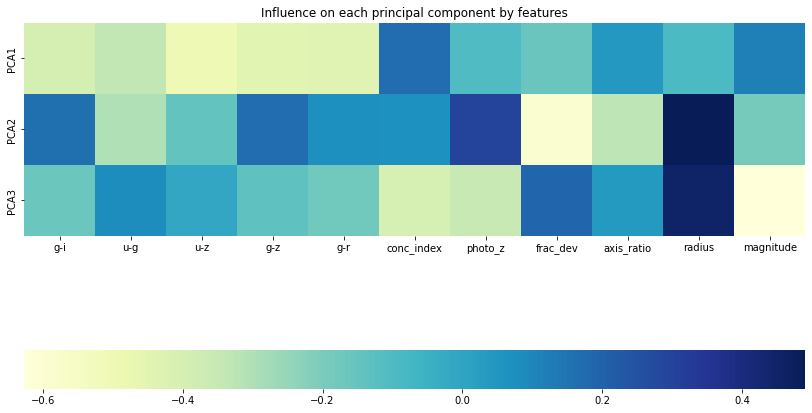

In [28]:
features_map = ['g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'conc_index', 'photo_z', 'frac_dev', 'axis_ratio','radius', 'magnitude']
fig = plt.figure(figsize = (14,14))
ax = sns.heatmap(pca_3_scaled.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca_3_scaled.n_components_+1)],
                 xticklabels=features_map,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
ax.set_title('Influence on each principal component by features')

## 95 % variance captured PCA

In [29]:
pca_95_scaled = PCA(n_components = 0.95, random_state = 2020)
principal_components_95_scaled = pca_95_scaled.fit_transform(x_scaled)
print('95 % of variance is captured in', str(len(principal_components_95_scaled[1])), 'principal components')

95 % of variance is captured in 6 principal components


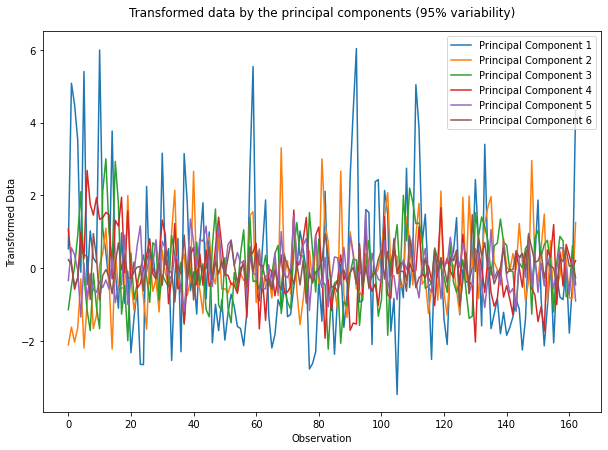

In [30]:
plt.figure(figsize=(10,7))
plt.plot(principal_components_95_scaled)
plt.xlabel('Observation')
plt.ylabel('Transformed Data')
plt.title('Transformed data by the principal components (95% variability)',pad=15)
plt.legend(['Principal Component 1','Principal Component 2','Principal Component 3','Principal Component 4','Principal Component 5','Principal Component 6'])

In [31]:
pca_6_scaled = PCA(n_components = 6, random_state = 2020)
principal_components_6_scaled = pca_6_scaled.fit_transform(x_scaled)
principal_df_6_scaled = pd.DataFrame(data = principal_components_6_scaled, columns = ['Principal Component 1','Principal Component 2','Principal Component 3','Principal Component 4','Principal Component 5','Principal Component 6'])
final_df_6_scaled = pd.concat([principal_df_6_scaled, df_training[['category']]], axis = 1)

Text(0.5, 1.0, 'Influence on each principal component by features')

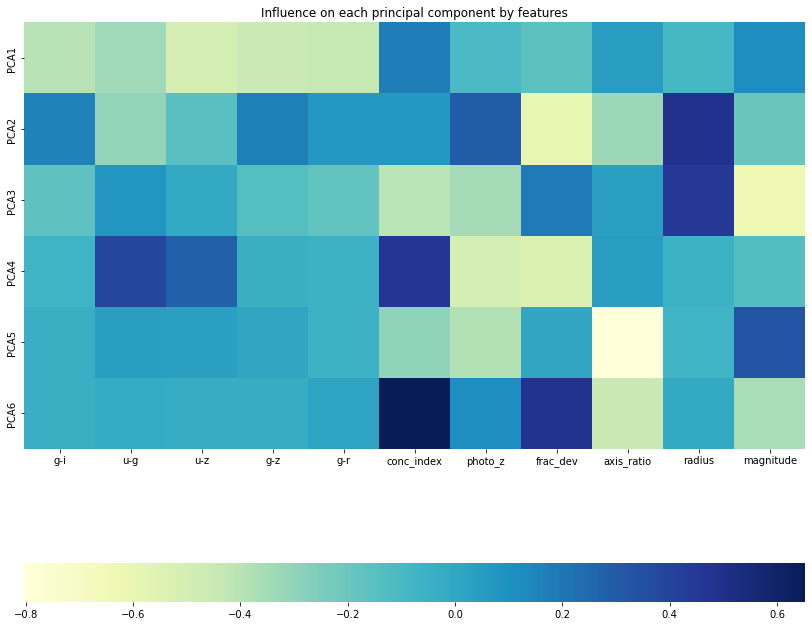

In [32]:
features_map = ['g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'conc_index', 'photo_z', 'frac_dev', 'axis_ratio','radius', 'magnitude']
fig = plt.figure(figsize = (14,14))
ax = sns.heatmap(pca_6_scaled.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca_6_scaled.n_components_+1)],
                 xticklabels=features_map,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
ax.set_title('Influence on each principal component by features')

In [33]:
#below code from https://towardsdatascience.com/scaling-outliers-handling-categorical-data-encoding-the-pca-hands-on-skills-series-part-ii-46e712e240eb

In [34]:
def transformer_bundle(X_train):

    transformer_dict = {'StandardScaler': StandardScaler(), 
                        'QuantileTransformer':QuantileTransformer(), 
                        'RobustScaler':RobustScaler(), 
                        'Normalizer':Normalizer(), 
                        'MaxAbsScaler':MaxAbsScaler(), 
                        'MinMaxScaler':MinMaxScaler(), 
                        'PowerTransformer':PowerTransformer()}

    X_train_trans_dict = {trs:transformer_dict[trs].fit_transform(X_train) for trs in transformer_dict.keys()} 
    X_train_trans_dict['NoTransformer'] = X_train.values
    
    X_train_pca_dict = {trs:PCA().fit_transform(X_train_trans_dict[trs]) for trs in transformer_dict.keys()}
    X_train_pca_dict['NoTransformer'] = PCA().fit_transform(X_train)
    
    return X_train_trans_dict, X_train_pca_dict 

In [35]:
def trans_heat_plot(X_trans_dict, y_axis_labels):
    nrows = len(X_trans_dict.keys())//2
    ncols = 2
    fig,ax = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, figsize=(ncols*6,nrows*3))
    for i in range(len(X_trans_dict.keys())):
        # the fancy modulo is just to make the "no transformation" come first...
        ind = (i-1)%len(X_trans_dict)
        trs = list(X_trans_dict.keys())[ind]
        X = X_trans_dict[trs]
        
        y_axis_labels = features 
        
        this_ax = ax[i//2,i%2]
        covmtrx = (np.cov(X.T))
        mask = np.triu(covmtrx,1)
        sns.heatmap(covmtrx, 
                    square=True,
                    mask = mask,
                    yticklabels=y_axis_labels,
                    center= 0,
                    cmap=(sns.color_palette('RdBu_r',256)),
                    ax=this_ax,
           )
        this_ax.set_title(trs,loc='left', fontsize='x-large')
        this_ax.set_xticklabels(this_ax.get_xticklabels(), rotation=0)
        
        
    plt.tight_layout()        
    plt.show()

In [36]:
X_trans_dict_o, X_pca_dict_o = transformer_bundle(df_training.loc[:,features])

C:\Users\Home\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning:

n_quantiles (1000) is greater than the total number of samples (163). n_quantiles is set to n_samples.



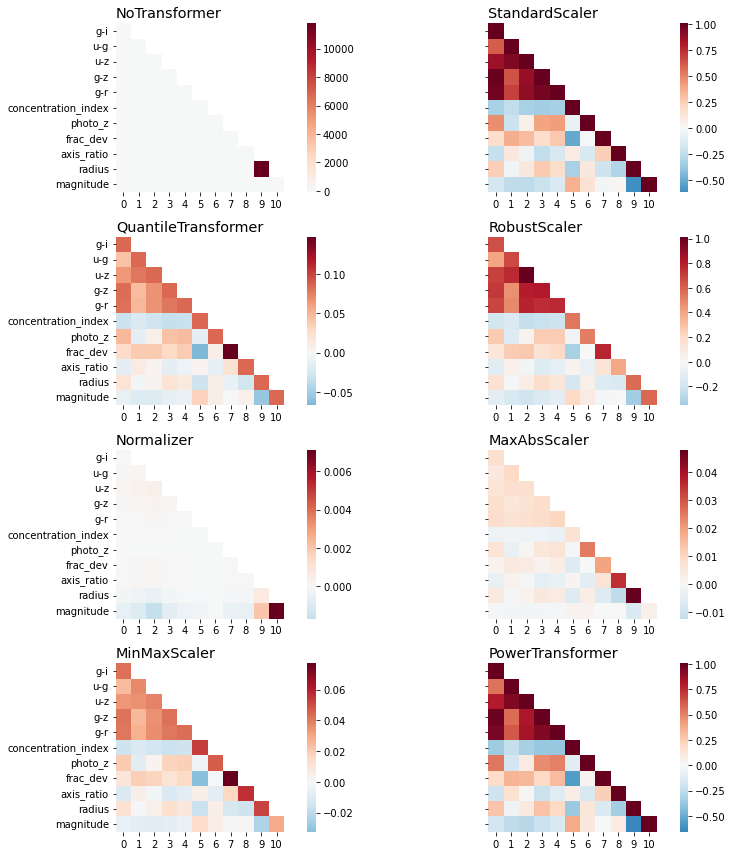

In [37]:
trans_heat_plot(X_trans_dict_o, y_axis_labels=features )